In [4]:
!pip install kss
!pip install kerastuner

ERROR: Could not find a version that satisfies the requirement kerastuner (from versions: none)
ERROR: No matching distribution found for kerastuner


In [1]:
%matplotlib inline

import os
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import string
import re

from konlpy.tag import Okt
# from konlpy.tag import Mecab 

#pip install kss
from kss import split_sentences   
#from pykospacing import spacing

from gensim.models import Word2Vec

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# from tensorflow.keras.layers import Embedding, Dense,GRU,Flatten, LSTM,Conv1D, GlobalMaxPooling1D, Embedding, Dropout, GlobalAveragePooling1D

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam

# from kerastuner.tuners import RandomSearch # 랜덤서치를 합니다

from gensim .models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
from tqdm import tqdm

### Ward clustering 군집 덴드로그램 

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

In [3]:
# 실루엣 계수 뽑는 함수
data = pd.read_pickle('team3_data_vectorized.pkl')
num_cluster = 9
def visualize_silhouette_layer1(data, num_cluster):
    clusters_range = range(2,int(num_cluster))
    results = []

    for i in clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=i,linkage='ward')
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_ac = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    return result, pivot_ac

In [4]:
df = data[["token", "review_vec"]]
df = df.dropna()
df

,token,review_vec
0,"[그냥, 정도, 맨날, 정해진, 밥상, 고요, 집, 반찬, 다, 말, 근데, 요즘,...","[-0.08329613, 0.011866811, 0.44026828, 0.48597..."
1,"[글, 쓸다, 기간, 밀리다, 일상, 난, 시험, 끝나다, 일생, 연, 빼다, 중간...","[0.49730548, -0.6956667, -0.15713012, 0.393049..."
2,"[도쿄, 워홀, 도쿄, 여행, 도쿄, 카페, 도쿄, 맛집, 신주쿠, 카페, 키치, ...","[-0.025188802, -0.06214978, 0.36642823, 0.7276..."
3,"[밀리, 돌아오다, 포스팅, 달, 종강, 여행, 다녀오다, 수고, 벌써, 반, 이렇...","[0.6014674, -0.019872742, 1.270496, 0.54509866..."
4,"[어제, 업무, 해결, 드디어, 숨, 돌리다, 여유, 생기다, 밀리다, 기르다, 써...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181..."
...,...,...
27667,"[히터, 컨벡터, 사려, 고민, 들이다, 근데, 막상, 보, 겨울, 기세, 무시, ...","[0.109961875, 0.045498237, -0.10372741, 0.0872..."
27668,"[히터, 영관, 데우다, 풍기, 바람, 나오다, 홈쇼핑, 욕실, 선전, 그거, 히터...","[-0.0037776246, -0.22041059, 0.07279901, 0.073..."
27669,"[히터, 풍기, 중, 더, 가성, 비, 용도, 정도, 알, 제품, 이면, 써다, 가...","[0.0536199, -0.171595, -0.06380176, 0.09210086..."
27670,"[힝, 갑자기, 땡기다, 미스터피자, 애슐리, 샐러드, 바, 먹다, 갈리다, 미스터...","[0.025825458, -0.11067809, -0.05174353, 0.1080..."


In [5]:
df["review vector"] = np.array(df["review_vec"],dtype=object)
print(df["review vector"])

0        [-0.08329613, 0.011866811, 0.44026828, 0.48597...
1        [0.49730548, -0.6956667, -0.15713012, 0.393049...
2        [-0.025188802, -0.06214978, 0.36642823, 0.7276...
3        [0.6014674, -0.019872742, 1.270496, 0.54509866...
4        [-0.4001867, -0.49134222, 0.6571016, 0.7585181...
                               ...                        
27667    [0.109961875, 0.045498237, -0.10372741, 0.0872...
27668    [-0.0037776246, -0.22041059, 0.07279901, 0.073...
27669    [0.0536199, -0.171595, -0.06380176, 0.09210086...
27670    [0.025825458, -0.11067809, -0.05174353, 0.1080...
27671    [0.06493242, -0.072161175, -0.14194833, 0.2747...
Name: review vector, Length: 27672, dtype: object


In [6]:
rv = []
ul = []
for a, i in enumerate(df["review_vec"]):
    if type(i) != int:
        rv.append(i)
    else:
        ul.append(a)
print(len(rv))
print(len(ul))
ul

27672
0


[]

In [7]:
for i in ul:
    df = df.drop(df.index[i])
df = df.reset_index(drop = True)
df

,token,review_vec,review vector
0,"[그냥, 정도, 맨날, 정해진, 밥상, 고요, 집, 반찬, 다, 말, 근데, 요즘,...","[-0.08329613, 0.011866811, 0.44026828, 0.48597...","[-0.08329613, 0.011866811, 0.44026828, 0.48597..."
1,"[글, 쓸다, 기간, 밀리다, 일상, 난, 시험, 끝나다, 일생, 연, 빼다, 중간...","[0.49730548, -0.6956667, -0.15713012, 0.393049...","[0.49730548, -0.6956667, -0.15713012, 0.393049..."
2,"[도쿄, 워홀, 도쿄, 여행, 도쿄, 카페, 도쿄, 맛집, 신주쿠, 카페, 키치, ...","[-0.025188802, -0.06214978, 0.36642823, 0.7276...","[-0.025188802, -0.06214978, 0.36642823, 0.7276..."
3,"[밀리, 돌아오다, 포스팅, 달, 종강, 여행, 다녀오다, 수고, 벌써, 반, 이렇...","[0.6014674, -0.019872742, 1.270496, 0.54509866...","[0.6014674, -0.019872742, 1.270496, 0.54509866..."
4,"[어제, 업무, 해결, 드디어, 숨, 돌리다, 여유, 생기다, 밀리다, 기르다, 써...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181..."
...,...,...,...
27667,"[히터, 컨벡터, 사려, 고민, 들이다, 근데, 막상, 보, 겨울, 기세, 무시, ...","[0.109961875, 0.045498237, -0.10372741, 0.0872...","[0.109961875, 0.045498237, -0.10372741, 0.0872..."
27668,"[히터, 영관, 데우다, 풍기, 바람, 나오다, 홈쇼핑, 욕실, 선전, 그거, 히터...","[-0.0037776246, -0.22041059, 0.07279901, 0.073...","[-0.0037776246, -0.22041059, 0.07279901, 0.073..."
27669,"[히터, 풍기, 중, 더, 가성, 비, 용도, 정도, 알, 제품, 이면, 써다, 가...","[0.0536199, -0.171595, -0.06380176, 0.09210086...","[0.0536199, -0.171595, -0.06380176, 0.09210086..."
27670,"[힝, 갑자기, 땡기다, 미스터피자, 애슐리, 샐러드, 바, 먹다, 갈리다, 미스터...","[0.025825458, -0.11067809, -0.05174353, 0.1080...","[0.025825458, -0.11067809, -0.05174353, 0.1080..."


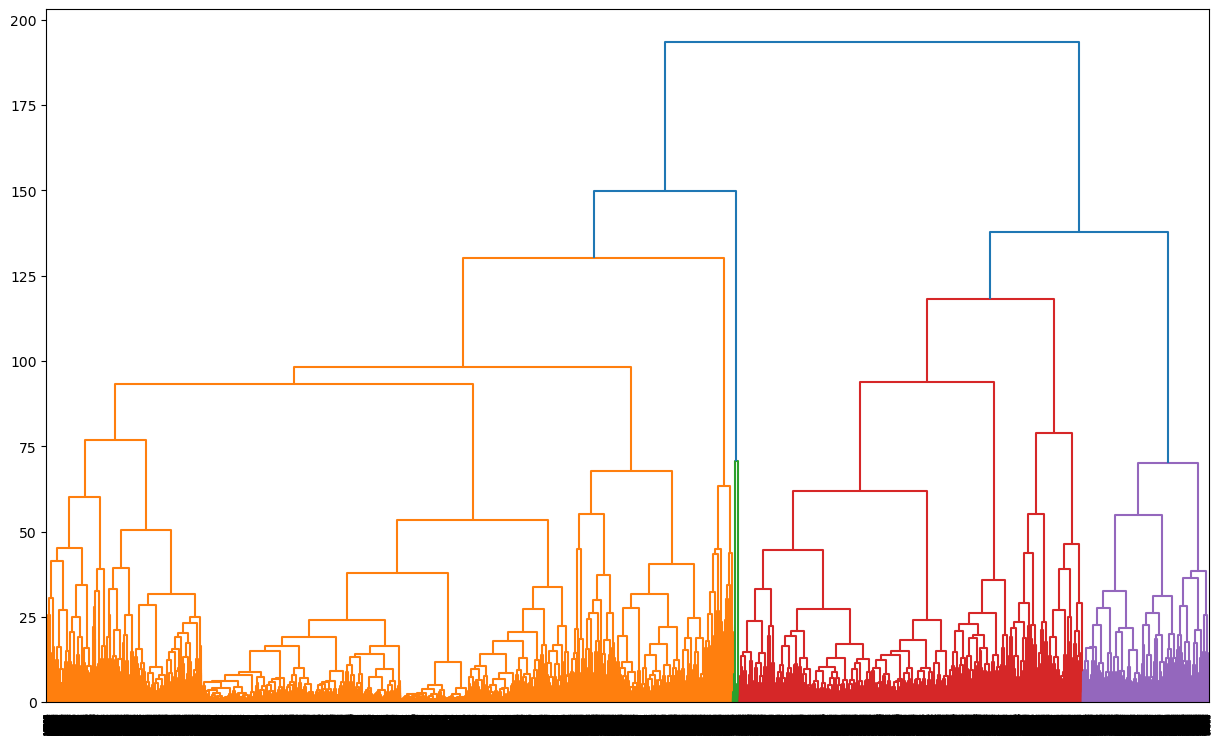

In [8]:
linked = linkage(rv, 'ward')

plt.figure(figsize=(15, 9))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### 실루엣 계수 조정

In [14]:
for i in tqdm(range(5)):
    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    label = model.fit_predict(rv)
    df["cluster {0}".format(i)] = label

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


ValueError: n_clusters should be an integer greater than 0. 0 was provided.

In [10]:
df

,token,review_vec,review vector,cluster 6,cluster 7,cluster 8
0,"[그냥, 정도, 맨날, 정해진, 밥상, 고요, 집, 반찬, 다, 말, 근데, 요즘,...","[-0.08329613, 0.011866811, 0.44026828, 0.48597...","[-0.08329613, 0.011866811, 0.44026828, 0.48597...",1,0,3
1,"[글, 쓸다, 기간, 밀리다, 일상, 난, 시험, 끝나다, 일생, 연, 빼다, 중간...","[0.49730548, -0.6956667, -0.15713012, 0.393049...","[0.49730548, -0.6956667, -0.15713012, 0.393049...",1,0,3
2,"[도쿄, 워홀, 도쿄, 여행, 도쿄, 카페, 도쿄, 맛집, 신주쿠, 카페, 키치, ...","[-0.025188802, -0.06214978, 0.36642823, 0.7276...","[-0.025188802, -0.06214978, 0.36642823, 0.7276...",2,2,2
3,"[밀리, 돌아오다, 포스팅, 달, 종강, 여행, 다녀오다, 수고, 벌써, 반, 이렇...","[0.6014674, -0.019872742, 1.270496, 0.54509866...","[0.6014674, -0.019872742, 1.270496, 0.54509866...",1,0,7
4,"[어제, 업무, 해결, 드디어, 숨, 돌리다, 여유, 생기다, 밀리다, 기르다, 써...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181...",1,0,7
...,...,...,...,...,...,...
27667,"[히터, 컨벡터, 사려, 고민, 들이다, 근데, 막상, 보, 겨울, 기세, 무시, ...","[0.109961875, 0.045498237, -0.10372741, 0.0872...","[0.109961875, 0.045498237, -0.10372741, 0.0872...",0,1,0
27668,"[히터, 영관, 데우다, 풍기, 바람, 나오다, 홈쇼핑, 욕실, 선전, 그거, 히터...","[-0.0037776246, -0.22041059, 0.07279901, 0.073...","[-0.0037776246, -0.22041059, 0.07279901, 0.073...",0,1,0
27669,"[히터, 풍기, 중, 더, 가성, 비, 용도, 정도, 알, 제품, 이면, 써다, 가...","[0.0536199, -0.171595, -0.06380176, 0.09210086...","[0.0536199, -0.171595, -0.06380176, 0.09210086...",0,1,0
27670,"[힝, 갑자기, 땡기다, 미스터피자, 애슐리, 샐러드, 바, 먹다, 갈리다, 미스터...","[0.025825458, -0.11067809, -0.05174353, 0.1080...","[0.025825458, -0.11067809, -0.05174353, 0.1080...",0,1,0


In [11]:
df.drop(['review vector', 'cluster 6', 'cluster 7', 'cluster 8'], axis = 1, inplace = True)

In [12]:
df

,token,review_vec
0,"[그냥, 정도, 맨날, 정해진, 밥상, 고요, 집, 반찬, 다, 말, 근데, 요즘,...","[-0.08329613, 0.011866811, 0.44026828, 0.48597..."
1,"[글, 쓸다, 기간, 밀리다, 일상, 난, 시험, 끝나다, 일생, 연, 빼다, 중간...","[0.49730548, -0.6956667, -0.15713012, 0.393049..."
2,"[도쿄, 워홀, 도쿄, 여행, 도쿄, 카페, 도쿄, 맛집, 신주쿠, 카페, 키치, ...","[-0.025188802, -0.06214978, 0.36642823, 0.7276..."
3,"[밀리, 돌아오다, 포스팅, 달, 종강, 여행, 다녀오다, 수고, 벌써, 반, 이렇...","[0.6014674, -0.019872742, 1.270496, 0.54509866..."
4,"[어제, 업무, 해결, 드디어, 숨, 돌리다, 여유, 생기다, 밀리다, 기르다, 써...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181..."
...,...,...
27667,"[히터, 컨벡터, 사려, 고민, 들이다, 근데, 막상, 보, 겨울, 기세, 무시, ...","[0.109961875, 0.045498237, -0.10372741, 0.0872..."
27668,"[히터, 영관, 데우다, 풍기, 바람, 나오다, 홈쇼핑, 욕실, 선전, 그거, 히터...","[-0.0037776246, -0.22041059, 0.07279901, 0.073..."
27669,"[히터, 풍기, 중, 더, 가성, 비, 용도, 정도, 알, 제품, 이면, 써다, 가...","[0.0536199, -0.171595, -0.06380176, 0.09210086..."
27670,"[힝, 갑자기, 땡기다, 미스터피자, 애슐리, 샐러드, 바, 먹다, 갈리다, 미스터...","[0.025825458, -0.11067809, -0.05174353, 0.1080..."


In [15]:
model = AgglomerativeClustering(n_clusters=5,linkage='ward')
label = model.fit_predict(rv)
df["cluster {0}".format(5)] = label

In [16]:
df

,token,review_vec,cluster 5
0,"[그냥, 정도, 맨날, 정해진, 밥상, 고요, 집, 반찬, 다, 말, 근데, 요즘,...","[-0.08329613, 0.011866811, 0.44026828, 0.48597...",0
1,"[글, 쓸다, 기간, 밀리다, 일상, 난, 시험, 끝나다, 일생, 연, 빼다, 중간...","[0.49730548, -0.6956667, -0.15713012, 0.393049...",0
2,"[도쿄, 워홀, 도쿄, 여행, 도쿄, 카페, 도쿄, 맛집, 신주쿠, 카페, 키치, ...","[-0.025188802, -0.06214978, 0.36642823, 0.7276...",0
3,"[밀리, 돌아오다, 포스팅, 달, 종강, 여행, 다녀오다, 수고, 벌써, 반, 이렇...","[0.6014674, -0.019872742, 1.270496, 0.54509866...",0
4,"[어제, 업무, 해결, 드디어, 숨, 돌리다, 여유, 생기다, 밀리다, 기르다, 써...","[-0.4001867, -0.49134222, 0.6571016, 0.7585181...",0
...,...,...,...
27667,"[히터, 컨벡터, 사려, 고민, 들이다, 근데, 막상, 보, 겨울, 기세, 무시, ...","[0.109961875, 0.045498237, -0.10372741, 0.0872...",1
27668,"[히터, 영관, 데우다, 풍기, 바람, 나오다, 홈쇼핑, 욕실, 선전, 그거, 히터...","[-0.0037776246, -0.22041059, 0.07279901, 0.073...",1
27669,"[히터, 풍기, 중, 더, 가성, 비, 용도, 정도, 알, 제품, 이면, 써다, 가...","[0.0536199, -0.171595, -0.06380176, 0.09210086...",1
27670,"[힝, 갑자기, 땡기다, 미스터피자, 애슐리, 샐러드, 바, 먹다, 갈리다, 미스터...","[0.025825458, -0.11067809, -0.05174353, 0.1080...",1


In [19]:
df['cluster 5'].value_counts()

1    15668
0     8173
3     2999
4      682
2      150
Name: cluster 5, dtype: int64

In [20]:
df.to_pickle("for_lda.pkl")